-- WORK IN PROGRESS --

**Dog Breed Identification**

Predict the breed of a dog given an input image of a dog

*Step 1: Import Modules*

In [1]:
from tqdm import tqdm
import seaborn as sns
from keras.preprocessing import image
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from PIL import Image
import sklearn as sklearn
from sklearn.metrics import confusion_matrix
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier as MLPC
from sklearn import model_selection
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from keras.utils.vis_utils import plot_model
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from os.path import join, exists, expanduser
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
import datetime as dt
start = dt.datetime.now()
%matplotlib inline

Using TensorFlow backend.


*Step 2: Describe Data*

In [2]:
df_train = pd.read_csv('../input/dog-breed-identification/labels.csv')
df_test = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
df_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


Text(0.5,1,'Distribution of Dog breeds')

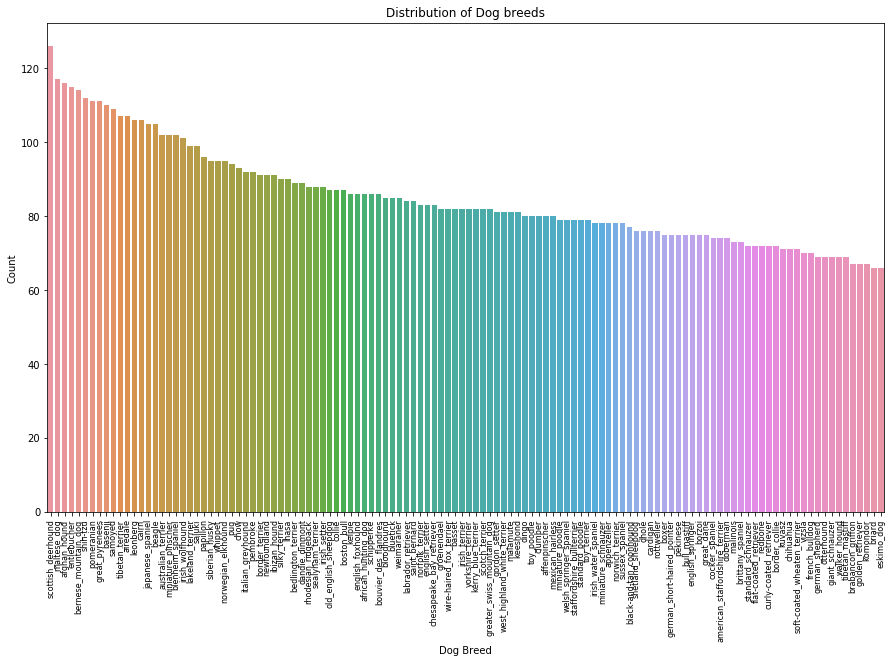

In [3]:
yy = pd.value_counts(df_train['breed'])

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("whitegrid")

ax = sns.barplot(x = yy.index, y = yy, data = df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')

*Step 3: Reduce Size of Dataset*

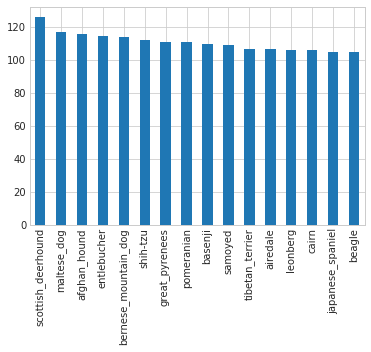

In [4]:
labels = df_train
top_breeds = sorted(list(labels['breed'].value_counts().head(16).index))
labels = labels[labels['breed'].isin(top_breeds)]
labels.breed.value_counts().plot(kind='bar')
df_train = labels ### remove this line to go back to 120 different breeds instead of 16

*Step 4: Load the Corresponding Images*

In [5]:
targets_series = pd.Series(df_train['breed'])
one_hot = pd.get_dummies(targets_series, sparse = True)
one_hot_labels = np.asarray(one_hot)

im_size = 128
x_train1 = []
y_train1 = []
x_test1 = []
i = 0 

for f, breed in tqdm(df_train.values):
    img = cv2.imread('../input/dog-breed-identification/train/{}.jpg'.format(f))
    label = one_hot_labels[i]
    x_train1.append(cv2.resize(img, (im_size, im_size)))
    y_train1.append(label)
    i += 1

# for f in tqdm(df_test['id'].values):
#     img = cv2.imread('../input/dog-breed-identification/test/{}.jpg'.format(f))
#     x_test1.append(cv2.resize(img, (im_size, im_size)))

y_train_raw = np.array(y_train1, np.uint8)
x_train_raw = np.array(x_train1, np.float32) / 255.
# x_testContest  = np.array(x_test1, np.float32) / 255.

num_class = y_train_raw.shape[1]

print(x_train_raw.shape)
print(y_train_raw.shape)
# print(x_testContest.shape)    

100%|██████████| 1777/1777 [00:04<00:00, 419.08it/s]


(1777, 128, 128, 3)
(1777, 16)


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_train_raw, y_train_raw, test_size=0.3, random_state=1)

*Step 5: Display Images*

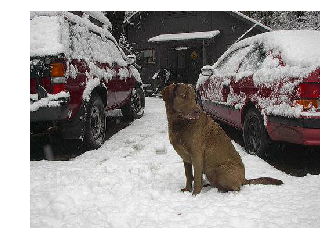

In [7]:
fig, ax = plt.subplots()
img = image.load_img('../input/dog-breed-identification/train/fff43b07992508bc822f33d8ffd902ae.jpg')
img = image.img_to_array(img)
ax.imshow(img / 255.) 
ax.axis('off')
plt.show()

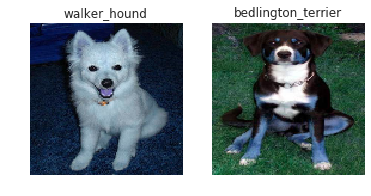

In [8]:
df_train2 = pd.read_csv('../input/dog-breed-identification/labels.csv')
top_breeds = df_train2['breed']

plt.subplot(1, 2, 1)
plt.title(top_breeds[np.where(y_train[5]==1)[0][0]])
plt.axis('off')
plt.imshow(x_train[5])
plt.subplot(1, 2, 2)
plt.title(top_breeds[np.where(y_train[7]==1)[0][0]])
plt.axis('off')
plt.imshow(x_train[7])
plt.show()

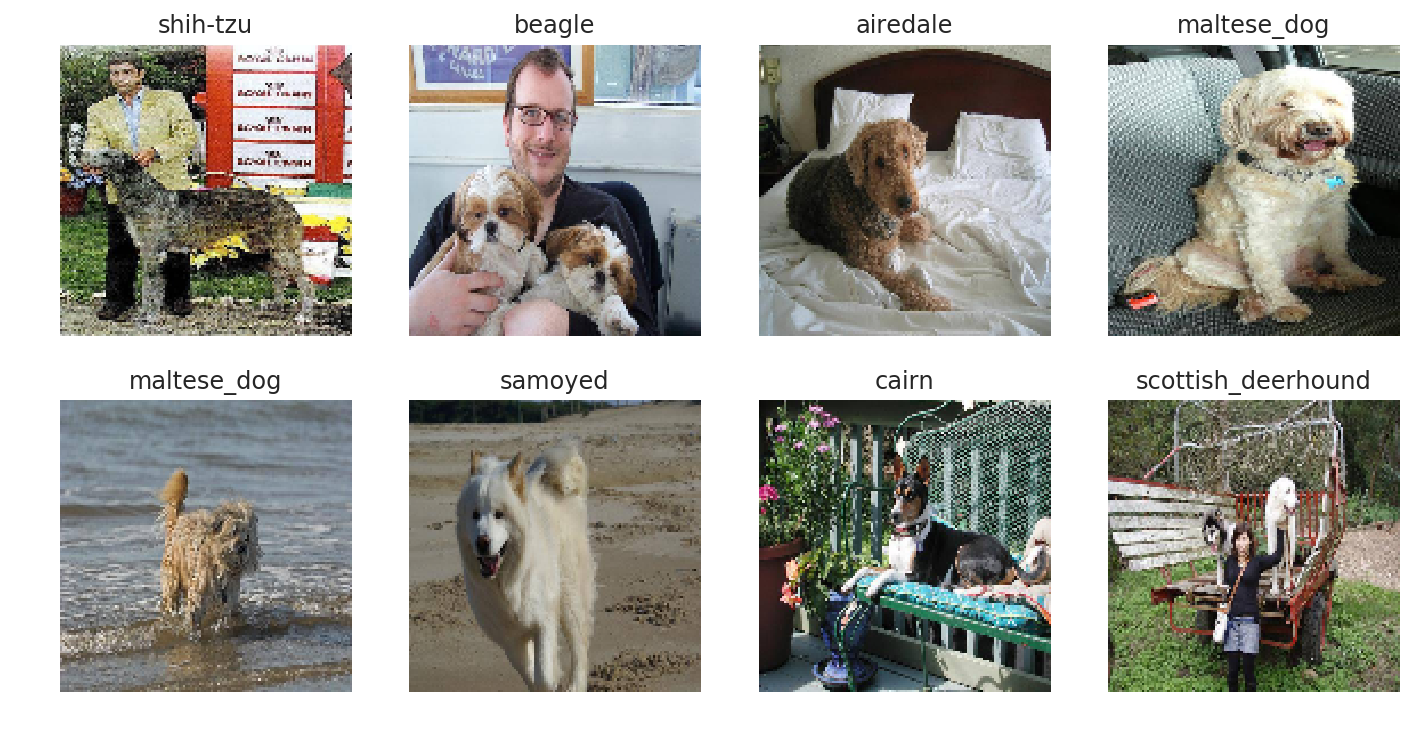

In [9]:
import random
df = df_train
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))
%config InlineBackend.figure_format = 'retina'
n=100
plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(x_train[random_index][:,:,::-1])
    plt.title(num_to_class[y_train[random_index].argmax()])
    plt.axis('off')


*Step 6: Define Helper Functions*

In [10]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (50,50))
    plt.figure(figsize = (15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Special callback to see learning curves
class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    
map_characters = {0:'none',1:'affenpinscher',2:'afghan_hound',3:'african_hunting_dog',
4:'airedale',5:'american_staffordshire_terrier',6:'appenzeller',7:'australian_terrier',
8:'basenji',9:'basset',10:'beagle',11:'bedlington_terrier',12:'bernese_mountain_dog',
13:'black-and-tan_coonhound',14:'blenheim_spaniel',15:'bloodhound',16:'bluetick',
17:'border_collie',18:'border_terrier',19:'borzoi',20:'boston_bull',21:'bouvier_des_flandres',
22:'boxer',23:'brabancon_griffon',24:'briard',25:'brittany_spaniel',26:'bull_mastiff',
27:'cairn',28:'cardigan',29:'chesapeake_bay_retriever',30:'chihuahua',31:'chow',
32:'clumber',33:'cocker_spaniel',34:'collie',35:'curly-coated_retriever',36:'dandie_dinmont',
37:'dhole',38:'dingo',39:'doberman',40:'english_foxhound',41:'english_setter',
42:'english_springer',43:'entlebucher',44:'eskimo_dog',45:'flat-coated_retriever',
46:'french_bulldog',47:'german_shepherd',48:'german_short-haired_pointer',49:'giant_schnauzer',
50:'golden_retriever',51:'gordon_setter',52:'great_dane',53:'great_pyrenees',
54:'greater_swiss_mountain_dog',55:'groenendael',56:'ibizan_hound',57:'irish_setter',
58:'irish_terrier',59:'irish_water_spaniel',60:'irish_wolfhound',61:'italian_greyhound',
62:'japanese_spaniel',63:'keeshond',64:'kelpie',65:'kerry_blue_terrier',66:'komondor',
67:'kuvasz',68:'labrador_retriever',69:'lakeland_terrier',70:'leonberg',71:'lhasa',72:'malamute',
73:'malinois',74:'maltese_dog',75:'mexican_hairless',76:'miniature_pinscher',77:'miniature_poodle',
78:'miniature_schnauzer',79:'newfoundland',80:'norfolk_terrier',81:'norwegian_elkhound',
82:'norwich_terrier',83:'old_english_sheepdog',84:'otterhound',85:'papillon',86:'pekinese',
87:'pembroke',88:'pomeranian',89:'pug',90:'redbone',91:'rhodesian_ridgeback',92:'rottweiler',
93:'saint_bernard',94:'saluki',95:'samoyed',96:'schipperke',97:'scotch_terrier',98:'scottish_deerhound',
99:'sealyham_terrier',100:'shetland_sheepdog',101:'shih-tzu',102:'siberian_husky',103:'silky_terrier',
104:'soft-coated_wheaten_terrier',105:'staffordshire_bullterrier',106:'standard_poodle',
107:'standard_schnauzer',108:'sussex_spaniel',109:'tibetan_mastiff',110:'tibetan_terrier',111:'toy_poodle',
112:'toy_terrier',113:'vizsla',114:'walker_hound',115:'weimaraner',116:'welsh_springer_spaniel',
117:'west_highland_white_terrier',118:'whippet',119:'wire-haired_fox_terrier',120:'yorkshire_terrier'}

In [11]:
map_characters = {0:'afghan_hound', 1:'airedale', 2:'basenji', 3:'beagle', 4:'bernese_mountain_dog', 5:'cairn', 6:'entlebucher', 7:'great_pyrenees', 8:'japanese_spaniel', 9:'leonberg', 10:'maltese_dog', 11:'pomeranian', 12:'samoyed', 13:'scottish_deerhound', 14:'shih-tzu', 15:'tibetan_terrier'}

*Step 7: Evaluate Convolutional Network Approach*

Epoch 1/10
39/38 [==============================] - 118s 3s/step - loss: 3.3688 - acc: 0.0723 - val_loss: 2.7650 - val_acc: 0.0712
Epoch 2/10
39/38 [==============================] - 114s 3s/step - loss: 2.7654 - acc: 0.0796 - val_loss: 2.7438 - val_acc: 0.0768
Epoch 3/10
39/38 [==============================] - 112s 3s/step - loss: 2.7413 - acc: 0.1006 - val_loss: 2.7098 - val_acc: 0.1966
Epoch 4/10
39/38 [==============================] - 112s 3s/step - loss: 2.7037 - acc: 0.1208 - val_loss: 2.6023 - val_acc: 0.1966
Epoch 5/10
39/38 [==============================] - 109s 3s/step - loss: 2.6254 - acc: 0.1456 - val_loss: 2.5057 - val_acc: 0.1648
Epoch 6/10
39/38 [==============================] - 104s 3s/step - loss: 2.5629 - acc: 0.1697 - val_loss: 2.4264 - val_acc: 0.2041
Epoch 7/10
39/38 [==============================] - 112s 3s/step - loss: 2.5417 - acc: 0.1905 - val_loss: 2.4229 - val_acc: 0.2509
Epoch 8/10
39/38 [==============================] - 114s 3s/step - loss: 2.4930 - a

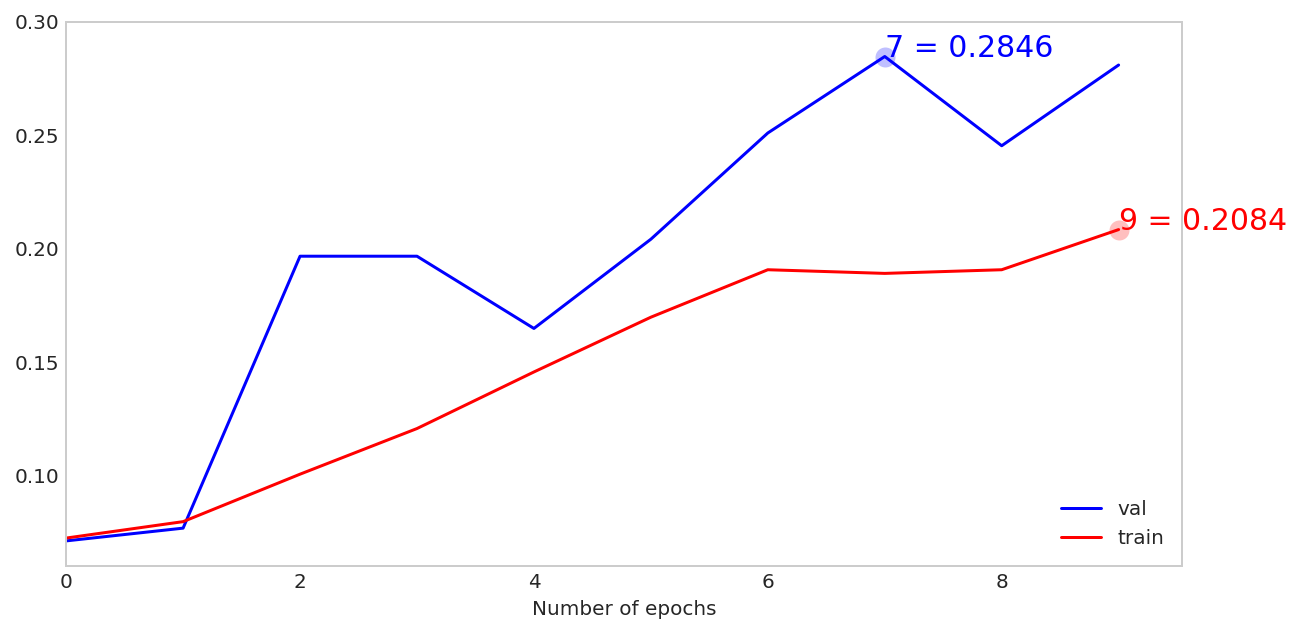

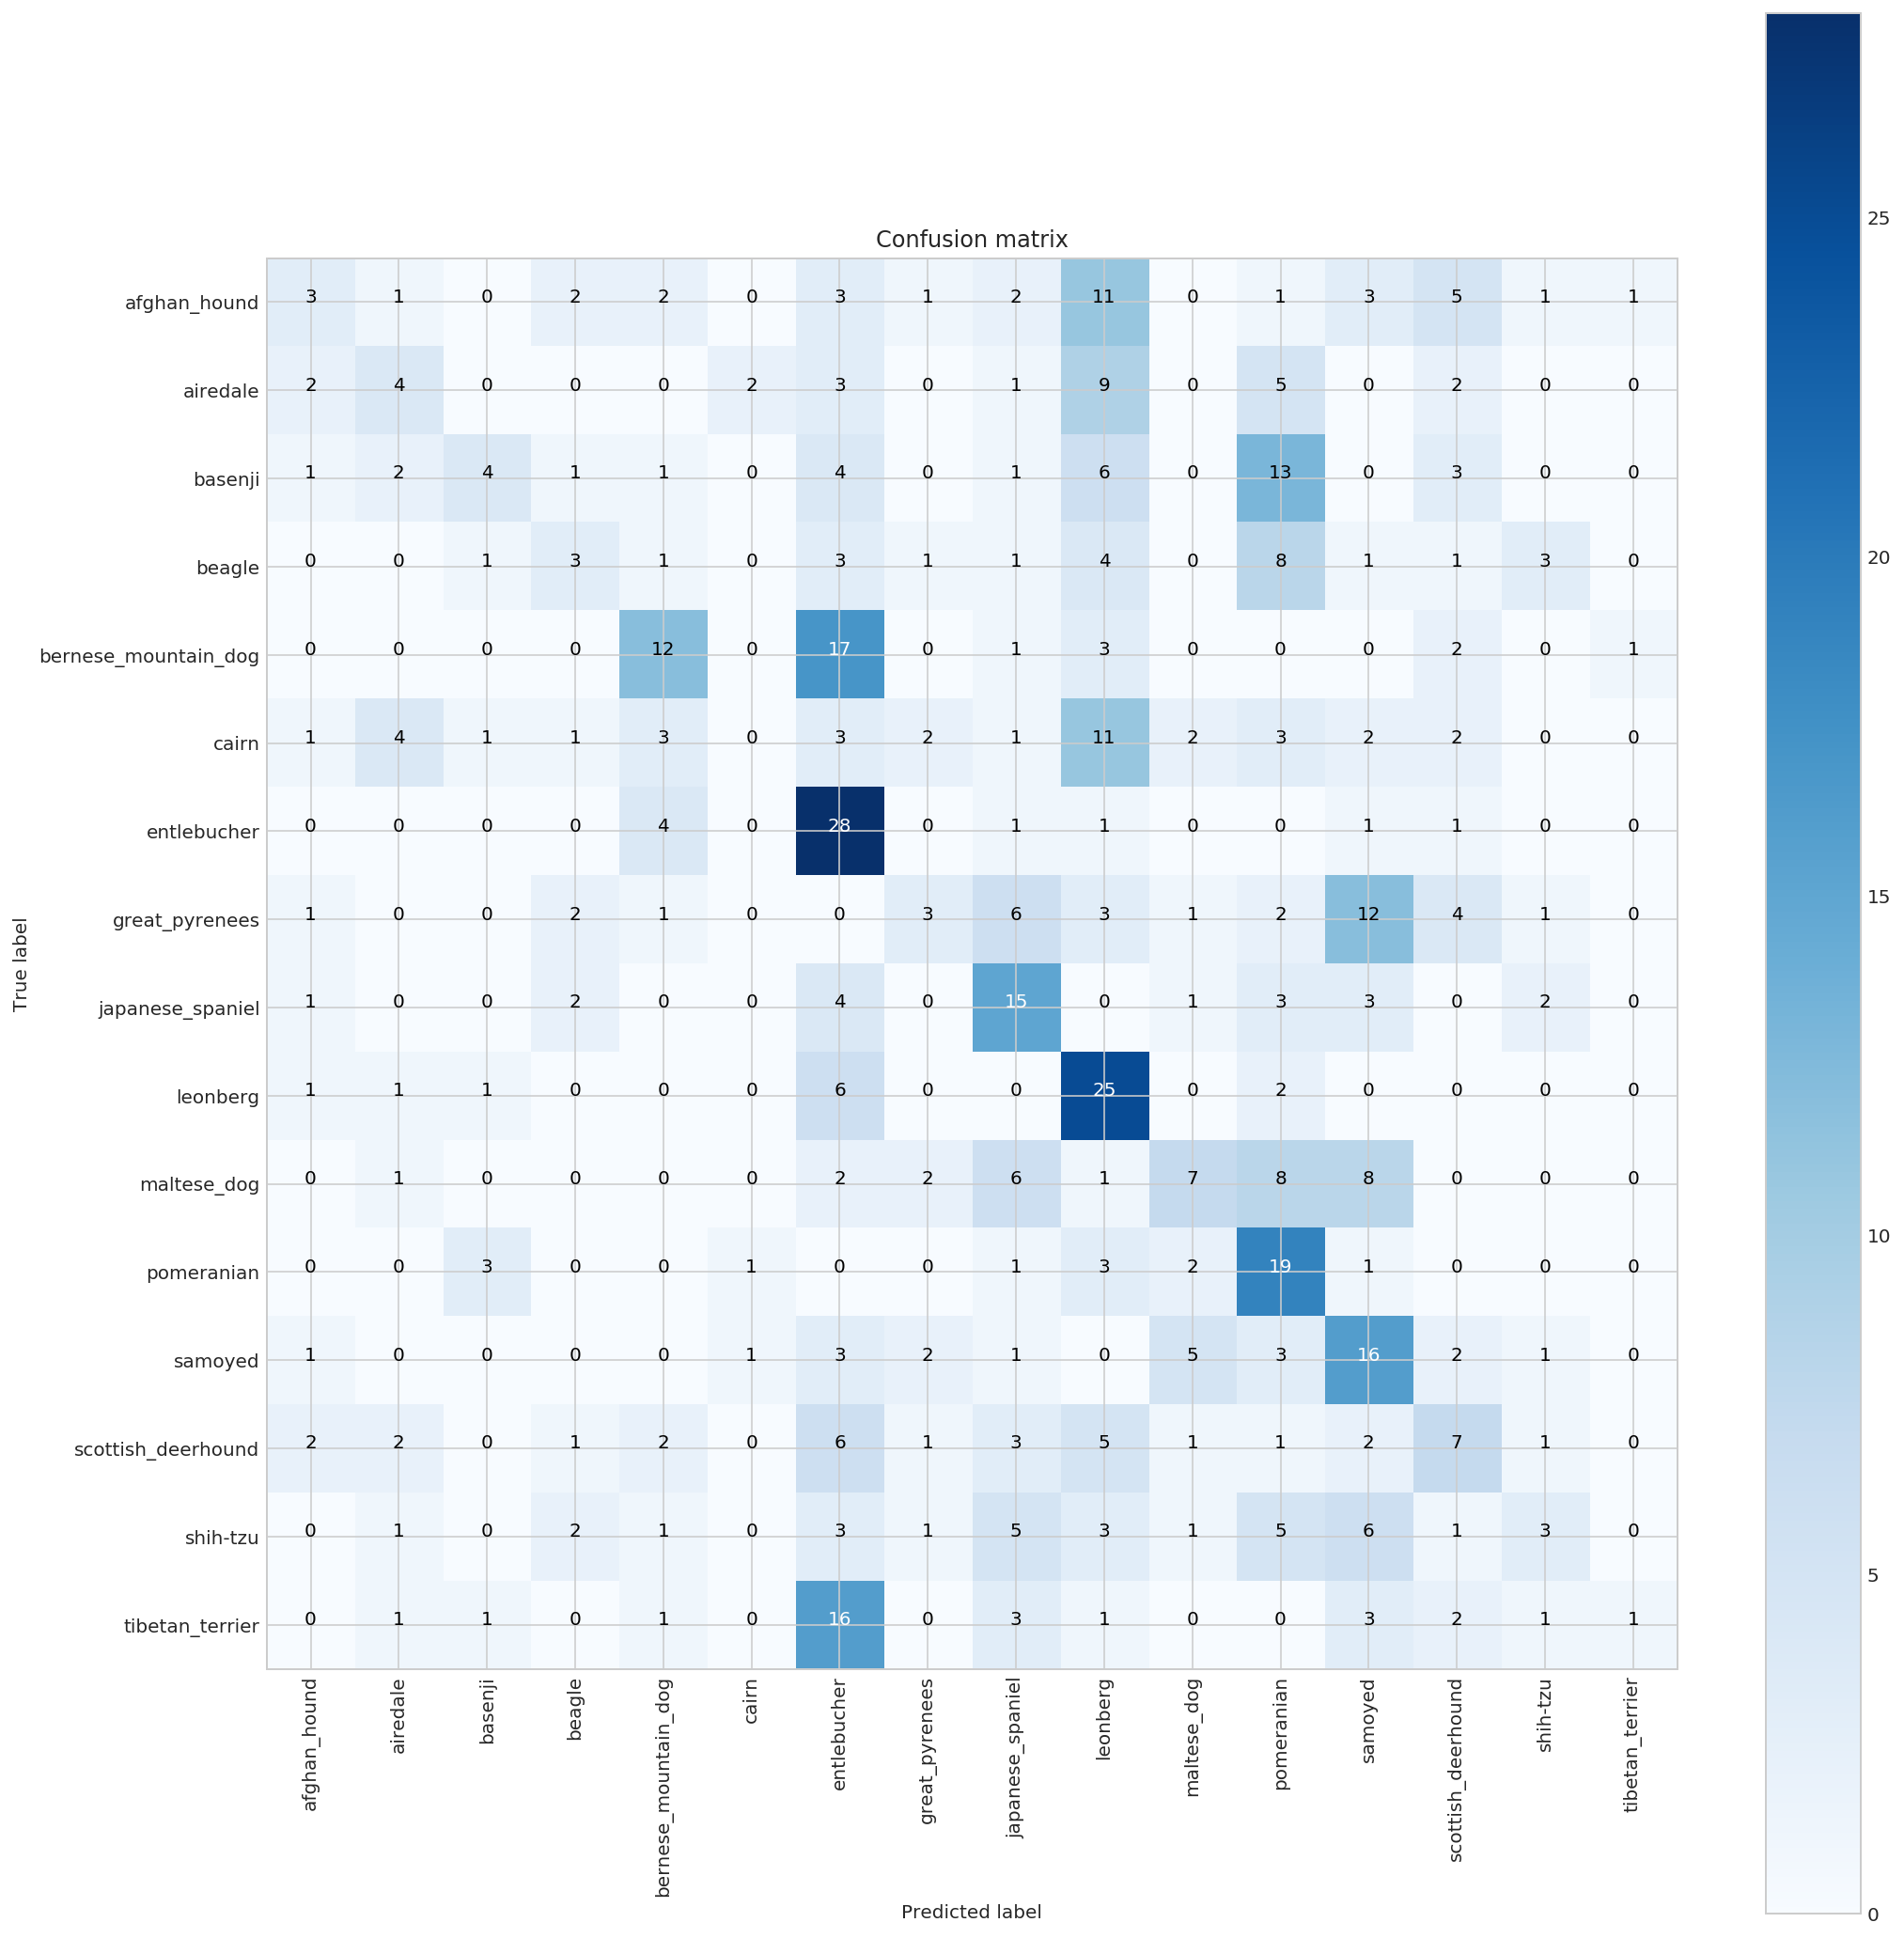

In [12]:
#num_classes = 120
num_classes = 16
def runKerasCNNAugment(a,b,c,d):
    #global model
    batch_size = 128
    epochs = 10
    im_size = 128
    #img_rows, img_cols = X_train.shape[1],X_train.shape[2]
    #input_shape = (img_rows, img_cols, 3)
    input_shape = (im_size,im_size,3)
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    model.fit_generator(datagen.flow(a,b, batch_size=32),
                        steps_per_epoch=len(a) / 32, epochs=epochs, validation_data = [c, d],callbacks = [MetricsCheckpoint('logs')])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #1C - accuracy:', score[1],'\n')
    y_pred = model.predict(c)
    #map_characters = {0: 'No Ship', 1: 'Ship'}
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='')    
    score = model.evaluate(c,d, verbose=0)
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values())) 
    plt.show()
    return model
runKerasCNNAugment(x_train,y_train,x_test,y_test)

Hmm... so far we have not done a very good job at identifying the type of dog in each given image.  I will try another approach instead.

*Step 8: Evaluate Transfer Learning Approach*

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

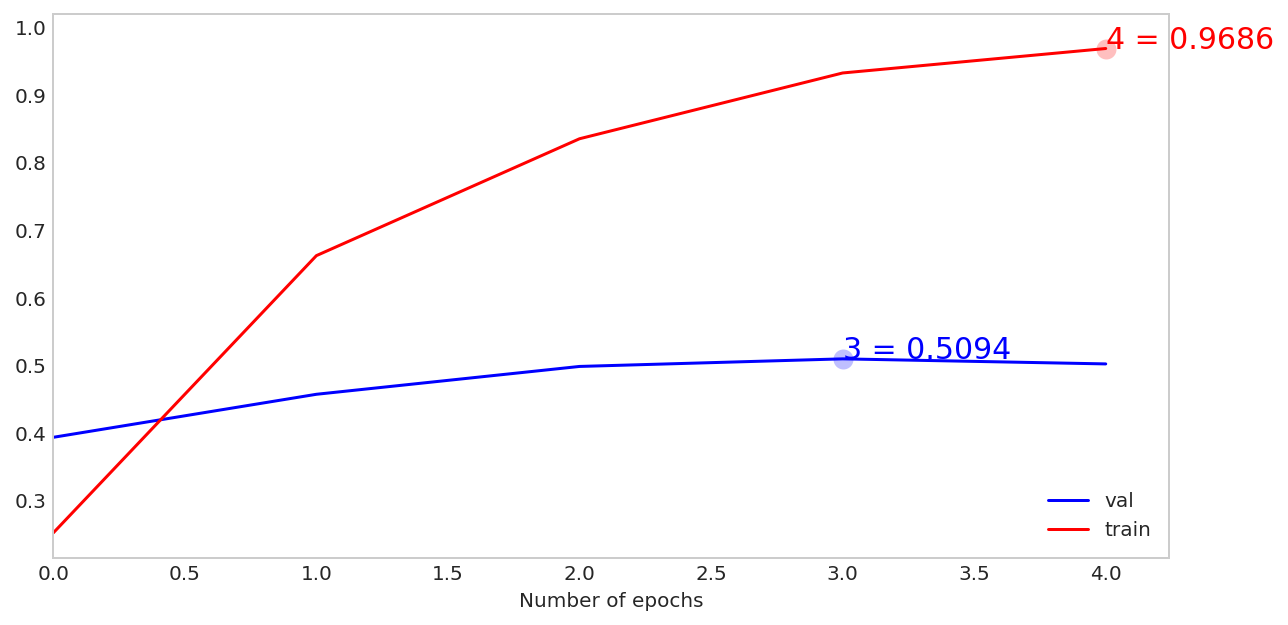

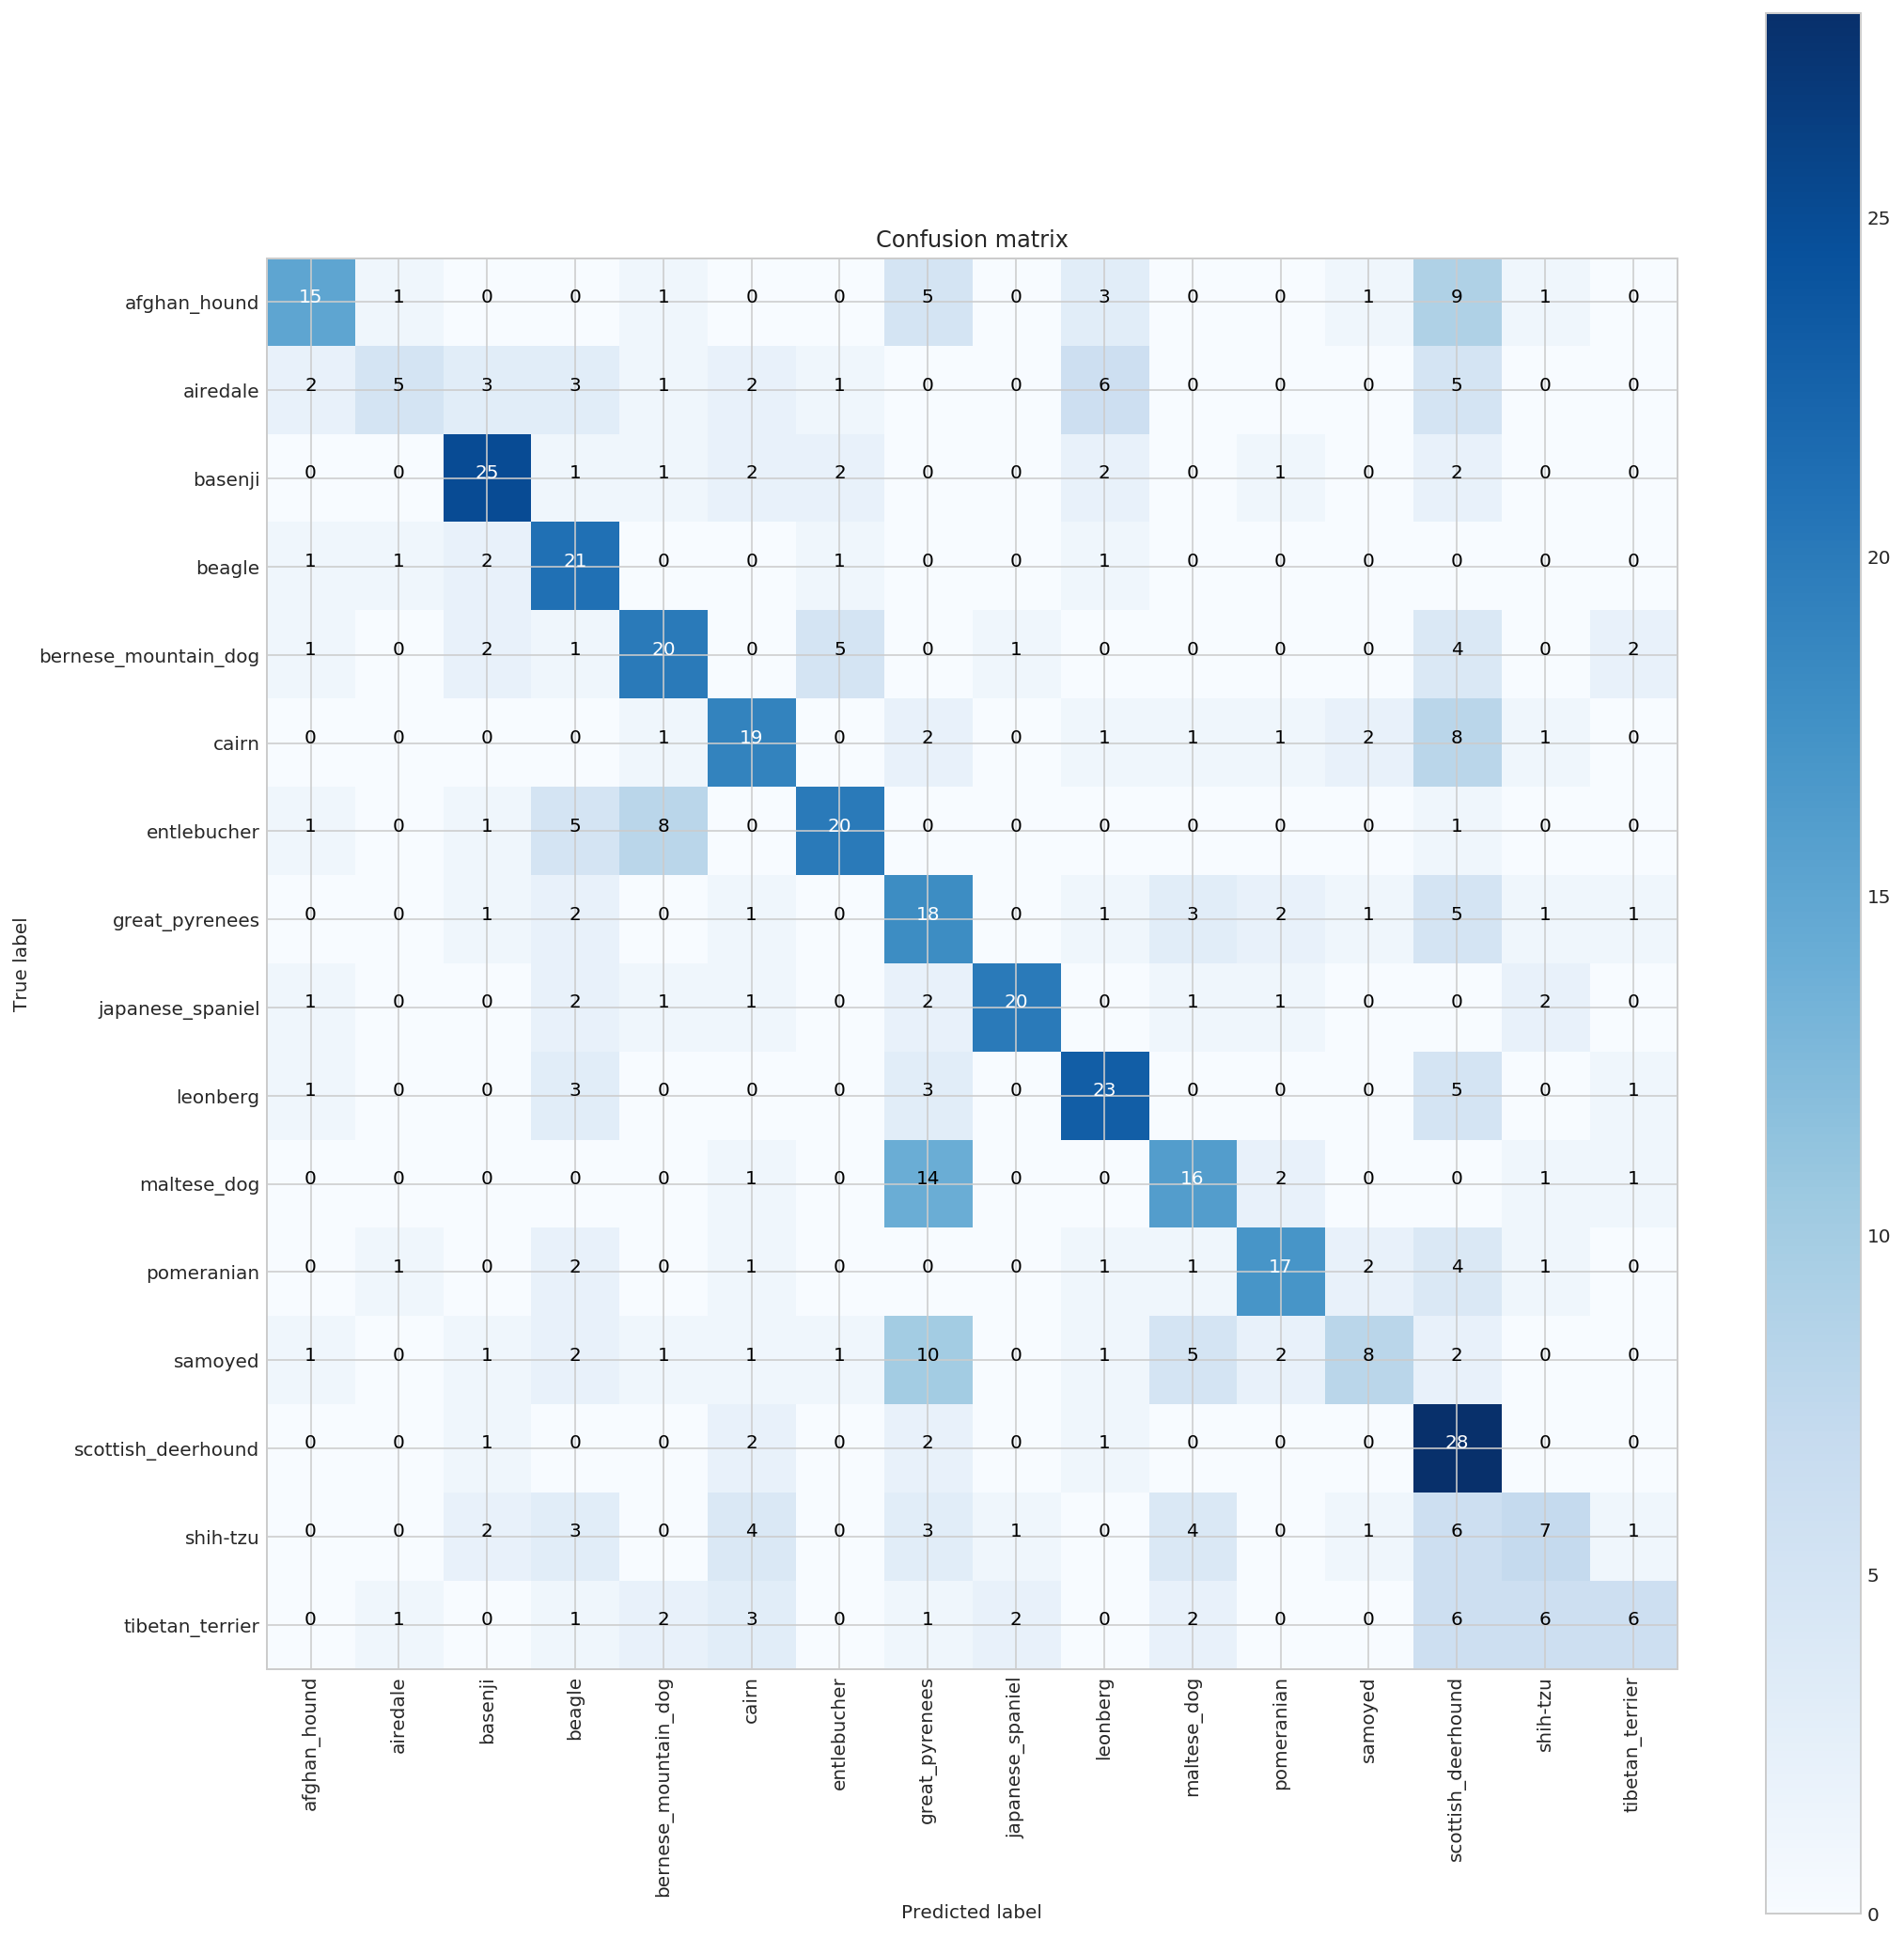

In [13]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
#num_class = 120
num_class = 16
def vgg16network(a,b,c,d):
    global model
    base_model = VGG16(#weights='imagenet',
        weights = weight_path, include_top=False, input_shape=(im_size, im_size, 3))
    # Add a new top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(num_class, activation='softmax')(x)
    # This is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)
    # First: train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    model.fit(a,b, epochs=5, validation_data=(c,d), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    score = model.evaluate(c,d, verbose=0)
    print('\nKeras CNN #2 - accuracy:', score[1], '\n')
    y_pred = model.predict(c)
    print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(d,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    plotKerasLearningCurve()
    plt.show()
    plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
    plt.show()
    return model
vgg16network(x_train,y_train,x_test,y_test)

That was much better!  I should still be able to improve the performance, though.  57% accuracy is much better than random chance but I will still have to come back and try again later, perhaps using more epochs.

*Step 9: Submit Predictions*

In [14]:
preds = model.predict(x_test, verbose=1)
sub = pd.DataFrame(preds)
# Set column names to those generated by the one-hot encoding earlier
col_names = one_hot.columns.values
sub.columns = col_names
# Insert the column id from the sample_submission at the start of the data frame
sub.insert(0, 'id', df_test['id'])
sub.head(5)

submission = sub
submission.to_csv('new_submission.csv', index=False)

534/534 [==============================] - 57s 107ms/step


In [15]:
end = dt.datetime.now()
print('Total time {} s.'.format((end - start).seconds))

Total time 2350 s.


Experiment Below

In [16]:
# *Step 10: Appreciate A Similar Script From Kaggle User Beluga*
# im_size = 224
# INPUT_SIZE = 224
# NUM_CLASSES = 16
# SEED = 1987
# data_dir = '../input/dog-breed-identification'
# labels = pd.read_csv(join(data_dir, 'labels.csv'))
# sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
# selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
# labels = labels[labels['breed'].isin(selected_breed_list)]
# labels['target'] = 1
# labels['rank'] = labels.groupby('breed').rank()['id']
# labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)
# np.random.seed(seed=SEED)
# rnd = np.random.random(len(labels))
# train_idx = rnd < 0.8
# valid_idx = rnd >= 0.8
# y_train = labels_pivot[selected_breed_list].values
# ytr = y_train[train_idx]
# yv = y_train[valid_idx]
# cache_dir = expanduser(join('~', '.keras'))
# if not exists(cache_dir):
#     makedirs(cache_dir)
# models_dir = join(cache_dir, 'models')
# if not exists(models_dir):
#     makedirs(models_dir)
# !cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
# !cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/
# !cp ../input/keras-pretrained-models/resnet50* ~/.keras/models/
# def read_img(img_id, train_or_test, size):
#     """Read and resize image.
#     # Arguments
#         img_id: string
#         train_or_test: string 'train' or 'test'.
#         size: resize the original image.
#     # Returns
#         Image as numpy array.
#     """
#     img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
#     img = image.img_to_array(img)
#     return img
# model = ResNet50(weights='imagenet')
# j = int(np.sqrt(NUM_CLASSES))
# i = int(np.ceil(1. * NUM_CLASSES / j))
# fig = plt.figure(1, figsize=(16, 16))
# grid = ImageGrid(fig, 111, nrows_ncols=(i, j), axes_pad=0.05)
# for i, (img_id, breed) in enumerate(labels.loc[labels['rank'] == 1, ['id', 'breed']].values):
#     ax = grid[i]
#     img = read_img(img_id, 'train', (224, 224))
#     ax.imshow(img / 255.)
#     x = preprocess_input(np.expand_dims(img.copy(), axis=0))
#     preds = model.predict(x)
#     _, imagenet_class_name, prob = decode_predictions(preds, top=1)[0][0]
#     ax.text(10, 180, 'ResNet50: %s (%.2f)' % (imagenet_class_name , prob), color='w', backgroundcolor='k', alpha=0.8)
#     ax.text(10, 200, 'LABEL: %s' % breed, color='k', backgroundcolor='w', alpha=0.8)
#     ax.axis('off')
# plt.show()

In [17]:
# from tensorflow.python.keras.applications import ResNet50
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# num_classes = 16
# resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

# my_new_model = Sequential()
# my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
# my_new_model.add(Dense(num_classes, activation='softmax'))

# # Say not to train first layer (ResNet) model. It is already trained
# my_new_model.layers[0].trainable = False
# my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# image_size = 140
# batch_size = 128
# epochs = 10

# a = x_train
# b = y_train
# c = x_test
# d = y_test

# my_new_model.fit(a,b,batch_size=batch_size,verbose=1,epochs=epochs,validation_data=(c,d),callbacks = [MetricsCheckpoint('logs')])
# score = model.evaluate(c,d, verbose=0)
# print('\nKeras CNN #2 - accuracy:', score[1], '\n')
# y_pred = model.predict(c)
# print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
# Y_pred_classes = np.argmax(y_pred,axis = 1) 
# Y_true = np.argmax(d,axis = 1) 
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
# plotKerasLearningCurve()

In [18]:
# from keras.layers import *
# from keras.models import *
# from keras.applications import *
# from keras.optimizers import *
# from keras.regularizers import *
# from keras.applications.inception_v3 import preprocess_input
# a = x_train
# b = y_train
# c = x_test
# d = y_test

# df = df_train
# n = len(df)
# breed = set(df['breed'])
# n_class = len(breed)
# class_to_num = dict(zip(breed, range(n_class)))
# num_to_class = dict(zip(range(n_class), breed))

# width = 140
# inputs = 16
# imagenet = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# def get_features(MODEL, data=a):
#     cnn_model = MODEL(include_top=False, input_shape=(width, width, 3), weights=imagenet)
#     inputs = Input((width, width, 3))
#     x = inputs
#     x = Lambda(preprocess_input, name='preprocessing')(x)
#     x = cnn_model(x)
#     x = GlobalAveragePooling2D()(x)
#     cnn_model = Model(inputs, x)
#     features = cnn_model.predict(data, batch_size=64, verbose=1)
#     return features
# inception_features = get_features(InceptionV3, a)
# #xception_features = get_features(Xception, a)
# #features = np.concatenate([inception_features, xception_features], axis=-1)
# features = inception_features
# inputs = Input(features.shape[1:])
# x = inputs
# x = Dropout(0.5)(x)
# x = Dense(n_class, activation='softmax')(x)
# model = Model(inputs, x)
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# h = model.fit(a, b, batch_size=128, epochs=10, validation_split=0.1)
# score = model.evaluate(c,d, verbose=0)
# print('\nKeras CNN #2 - accuracy:', score[1], '\n')
# y_pred = model.predict(c)
# print('\n', sklearn.metrics.classification_report(np.where(d > 0)[1], np.argmax(y_pred, axis=1), target_names=list(map_characters.values())), sep='') 
# Y_pred_classes = np.argmax(y_pred,axis = 1) 
# Y_true = np.argmax(d,axis = 1) 
# confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot_confusion_matrix(confusion_mtx, classes = list(map_characters.values()))
# plotKerasLearningCurve()

In [19]:
# not_hot_labels = np.asarray(targets_series)
# i = 0  
# x_trainFlat = []
# y_trainFlat = []
# for f, breed in tqdm(df_train.values):
#     img = cv2.imread('../input/train/{}.jpg'.format(f))
#     label = not_hot_labels[i]
#     x_trainFlat.append(cv2.resize(img, (im_size, im_size)))
#     y_trainFlat.append(label)
#     i += 1

# #y_trainFlat_raw = np.array(y_trainFlat, np.uint8)
# y_trainFlat_raw = np.array(y_trainFlat)
# x_trainFlat_raw = np.array(x_trainFlat, np.float32) / 255.
# print(x_trainFlat_raw.shape)
# print(y_trainFlat_raw.shape)
#     #
# x_trainFlat,x_testFlat,y_trainFlat,y_testFlat = train_test_split(x_trainFlat_raw, y_trainFlat_raw, test_size=0.3, random_state=1)    
#     #

# # Make Data 1D for compatability with standard classifiers

# x_trainFlatShape = x_trainFlat.shape[1]*x_trainFlat.shape[2]*x_trainFlat.shape[3]
# x_testFlatShape = x_testFlat.shape[1]*x_testFlat.shape[2]*x_testFlat.shape[3]

# x_trainFlatter = x_trainFlat.reshape(x_trainFlat.shape[0], x_trainFlatShape)
# x_testFlatter = x_testFlat.reshape(x_testFlat.shape[0], x_testFlatShape)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
# print(x_trainFlat.shape)
# print(y_trainFlat.shape)
# print(x_testFlat.shape)
# print(y_testFlat.shape)
# print(x_trainFlatter.shape)
# print(y_trainFlat.shape)
# print(x_testFlatter.shape)
# print(y_testFlat.shape)
# #
# #
# #
# x_trainFlatter,x_testFlatter,y_trainFlat,y_testFlat = x_trainFlatter[:100],x_testFlatter[:100],y_trainFlat[:100],y_testFlat[:100]
# #
# #
# #runLogisticRegression
# def runLogisticRegression(a,b,c,d):
#     """Run LogisticRegression w/ Kfold CV"""
#     model = LogisticRegression()
#     model.fit(a,b)
#     kfold = model_selection.KFold(n_splits=10)
#     accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
#     mean = accuracy.mean() 
#     stdev = accuracy.std()
#     print('LogisticRegression - Training set accuracy: %s (%s)' % (mean, stdev))
#     print('')
# runLogisticRegression(x_trainFlatter,y_trainFlat,x_testFlatter,y_testFlat)

# def compareABunchOfDifferentModelsAccuracy(a,b,c,d):   
#     print('\nCompare Multiple Classifiers:')
#     print('\nK-Fold Cross-Validation Accuracy:\n')
#     models = []
#     models.append(('LR', LogisticRegression()))
#     models.append(('RF', RandomForestClassifier()))
#     models.append(('KNN', KNeighborsClassifier()))
#     models.append(('SVM', SVC()))
#     models.append(('LSVM', LinearSVC()))
#     models.append(('GNB', GaussianNB()))
#     models.append(('DTC', DecisionTreeClassifier()))
# #    models.append(('GBC', GradientBoostingClassifier()))
# #    models.append(('LDA', LinearDiscriminantAnalysis()))  
#     resultsAccuracy = []
#     names = []
#     for name, model in models:
#         model.fit(a,b)
#         kfold = model_selection.KFold(n_splits=10, random_state=7)
#         accuracy_results = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
#         resultsAccuracy.append(accuracy_results)
#         names.append(name)
#         accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
#         print(accuracyMessage)
   
#     # boxplot algorithm comparison
#     fig = plt.figure()
#     fig.suptitle('Algorithm Comparison: Accuracy')
#     ax = fig.add_subplot(111)
#     plt.boxplot(resultsAccuracy)
#     ax.set_xticklabels(names)
#     ax.set_ylabel('Cross-Validation: Accuracy Score')
#     plt.show()
#     return

# compareABunchOfDifferentModelsAccuracy(x_trainFlatter,y_trainFlat,x_testFlatter,y_testFlat)

# def defineModels():
#     print('LR = LogisticRegression')
#     print('RF = RandomForestClassifier')
#     print('KNN = KNeighborsClassifier')
#     print('SVM = Support Vector Machine SVC')
#     print('LSVM = LinearSVC')
#     print('GNB = GaussianNB')
#     print('DTC = DecisionTreeClassifier')
# #    print('GBC = GradientBoostingClassifier')
# #    print('LDA = LinearDiscriminantAnalysis')
#     return
# defineModels()

To Do:
1) Evaluate new transfer learning approaches